# TARRAGONA DATATHON, November 2018
## team_10 activities

*   Marianna Polini: Data Scientist / SQL-Databases
*   Christian Villavicencio: Clinician
*   Eva Machado: Clinician
*   Raquel Carbonell: Clinician
*   Diana Gil: Clinician
*   Laia Labad: Clinician
*   Santiago Frias: Data Scientist / Statistics-Models



## Septic Shock query and stay time representation

In [1]:
# Importacion Librerias
import numpy
print('numpy Version: ',numpy.__version__)
import os
import pandas
print('Pandas Version: ',pandas.__version__)
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.figsize']= [20,12]
import matplotlib.patches as patches
import matplotlib.path as path
import tensorflow
print('tensorflow Version: ',tensorflow.__version__)
# Visualización Dataframes
from IPython.display import display, HTML

# Acceso repositorio datos Datathon.
from google.colab import auth
from google.cloud import bigquery

('numpy Version: ', '1.14.6')
('Pandas Version: ', u'0.22.0')
('tensorflow Version: ', '1.12.0')


In [0]:
# Autentificacion BigQuery, generacion resumen verificacion a pegar despues de validacion.
auth.authenticate_user()

In [0]:
# Hosting solo lectura proyecto datathon-tarragona-2018
# Creado proyecto compartido team_10 asignado en este kernel
project_id='datathon-tarragona-2018'
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id

In [0]:
# Asignar configuracion de la ejecucion de sentencias SQL en BigQuery
def run_query(query):
  return pandas.io.gbq.read_gbq(query, project_id=project_id, verbose=True, configuration={'query':{'useLegacySql': False}})

In [24]:
consulta

,patientunitstayid,diagnosisid
0,141314,4062967
1,141314,4214952
2,141314,4050357


# Crude Data

In [0]:
consulta = run_query("SELECT patientunitstayid,activeupondischarge,diagnosisoffset FROM [physionet-data:eicu_crd.diagnosis] WHERE LOWER(diagnosisstring) LIKE '%septic shock%' ORDER BY patientunitstayid,activeupondischarge, diagnosisoffset")

In [13]:
consulta

,patientunitstayid,activeupondischarge,diagnosisoffset
0,141515,False,134
1,141515,False,2418
2,141515,False,3346
3,141515,True,3870
4,141751,False,45
5,141751,True,460
6,141959,True,219
7,142483,False,1363
8,142483,False,1741
9,142483,False,21476


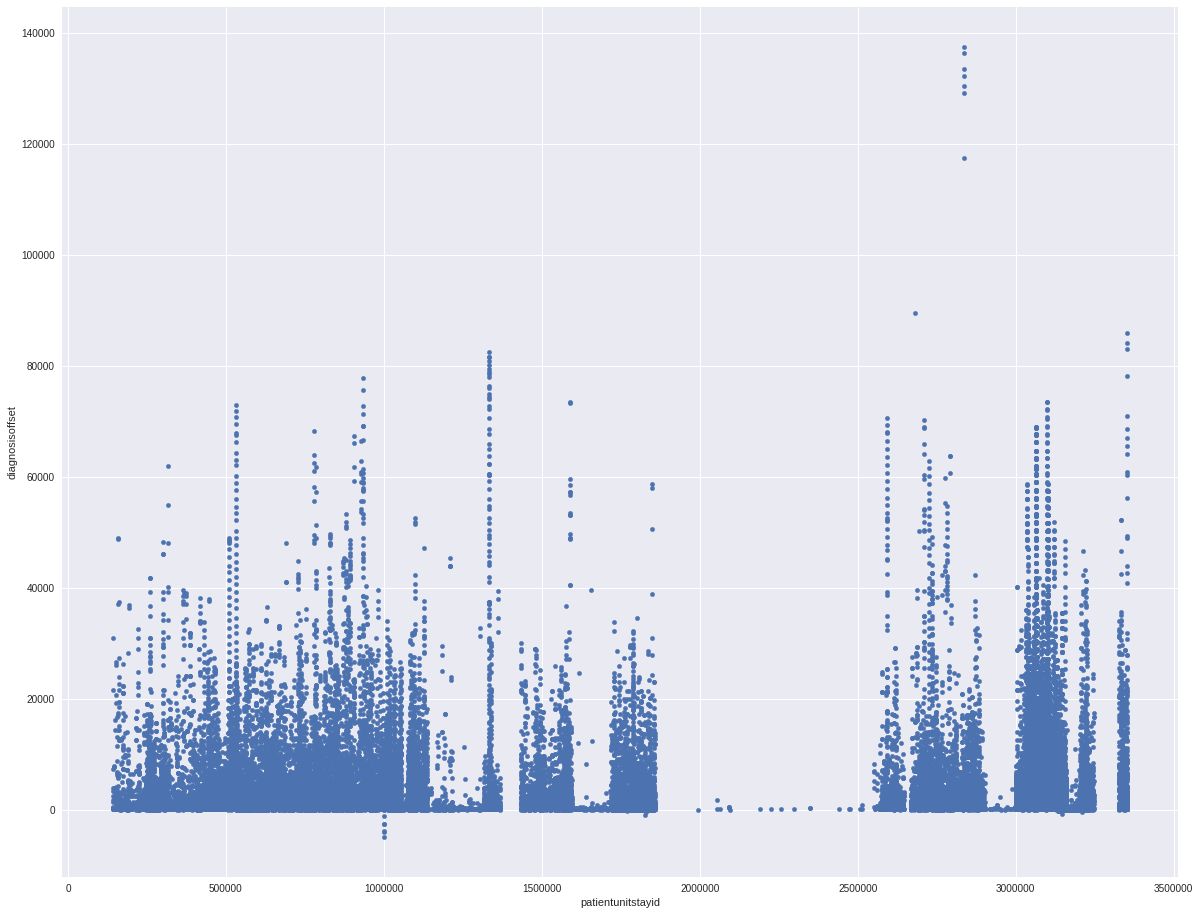

In [16]:
# Scatter Plot de correlacion entre eje x, eje y, de ejemplo crude data
consulta.plot(figsize = [20,16], kind='scatter',x='patientunitstayid',y='diagnosisoffset' )

# Data for patients registered on Septic Shock Diag with almost near of 3 days

In [112]:
consulta

,admissionheight
0,172.70
1,177.80
2,162.60
3,173.00
4,165.10
5,165.10
6,160.00
7,170.20
8,180.30
9,176.53


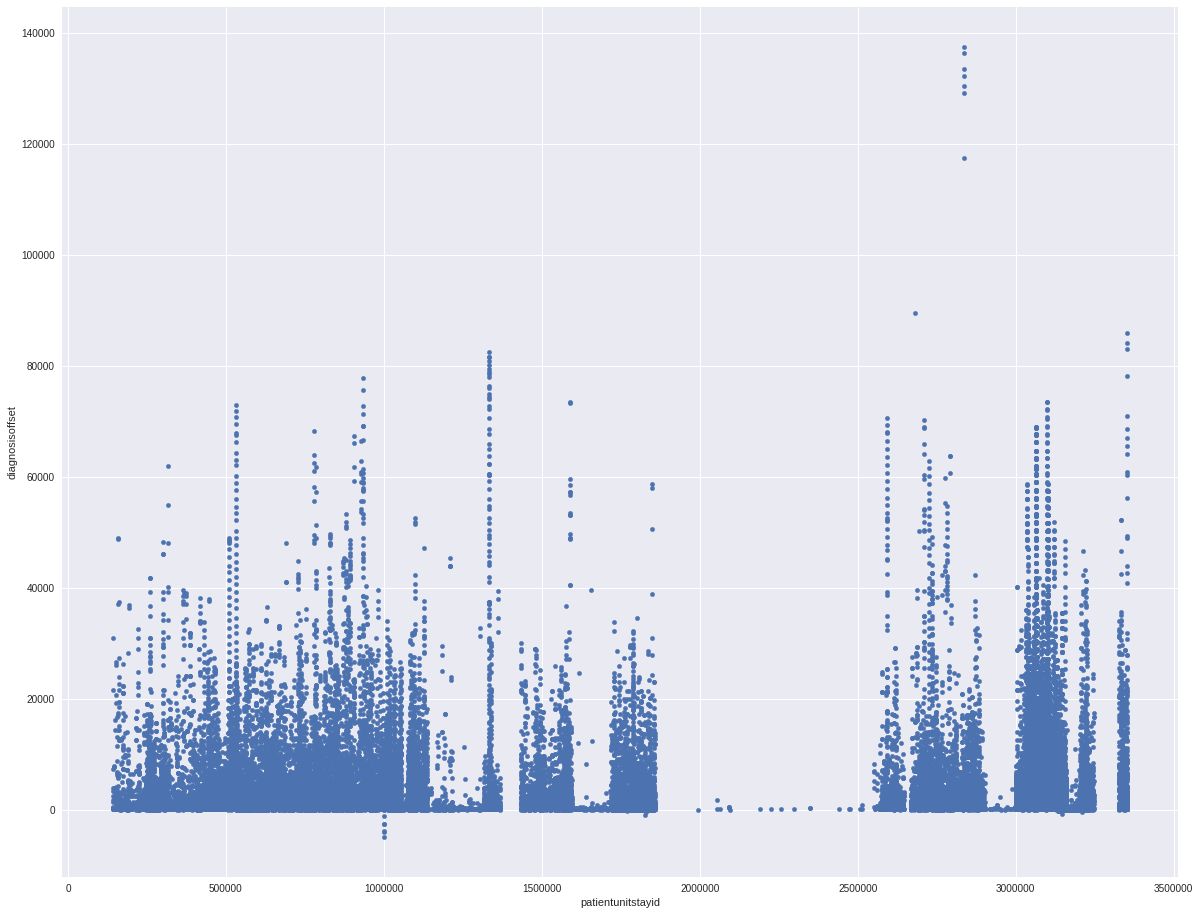

In [14]:
# Scatter Plot de correlacion entre eje x, eje y, eliminados pacientes de los que tenemos datos de tres dias 
consulta.plot(figsize = [20,16], kind='scatter',x='patientunitstayid',y='diagnosisoffset' )

In [0]:
# We selected the best variables in the database of Eicu_crd with the scope to find the PATTERNS the first three days at the entrace in the ICU
consulta=run_query("SELECT p.patientunitstayid,p.admissionweight,p.admissionheight,p.gender,p.age, d.diagnosisid, ap.saps3day1, ap.cirrhosis,ap.diabetes,ap.saps3today,ap.saps3yesterday FROM `physionet-data.eicu_crd.diagnosis` as d  inner join `physionet-data.eicu_crd.patient` as p  on p.patientunitstayid = d.patientunitstayid  inner join `physionet-data.eicu_crd_demo.apachepredvar` as ap on p.patientunitstayid=ap.patientunitstayid WHERE LOWER(diagnosisstring) LIKE '%septic shock%' AND d.diagnosisoffset < 4000 ORDER BY d.patientunitstayid")




In [28]:
consulta

,patientunitstayid,admissionweight,admissionheight,gender,age,diagnosisid,saps3day1,cirrhosis,diabetes,saps3today,saps3yesterday
0,143599,75.50,172.70,Male,27,3781507,0,0,0,0,0
1,143599,75.50,172.70,Male,27,4108080,0,0,0,0,0
2,145917,64.80,162.60,Male,53,3853742,0,0,1,0,0
3,145917,64.80,162.60,Male,53,3834782,0,0,1,0,0
4,151900,86.80,165.10,Female,66,3850876,0,0,0,0,0
5,151900,86.80,165.10,Female,66,3707280,0,0,0,0,0
6,151900,86.80,165.10,Female,66,3892141,0,0,0,0,0
7,168236,121.00,193.00,Male,16,3890667,0,0,0,0,0
8,168236,121.00,193.00,Male,16,3418518,0,0,0,0,0
9,168236,121.00,193.00,Male,16,3456917,0,0,0,0,0


In [0]:
# the intention is to applt the No supervised Model with K-Means Clustering Implementation in Python
#https://www.kaggle.com/andyxie/k-means-clustering-implementation-in-python


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(consulta)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()